In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
dataset=pd.read_csv("UberDataset.csv")

In [102]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [104]:
dataset.shape

(1156, 7)

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### there are 503 missing values in PURPOSE column    

# Data Pre-Processing

In [110]:
dataset['PURPOSE'].fillna("Not",inplace=True)

C:\Users\Komal\AppData\Local\Temp\ipykernel_21604\3622719247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("Not",inplace=True)


In [112]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [116]:
dataset.START_DATE=pd.to_datetime(dataset.START_DATE,errors='coerce')


In [118]:
dataset.END_DATE=pd.to_datetime(dataset.END_DATE,errors='coerce')

In [120]:
from datetime import datetime
dataset['strtdate']=pd.DatetimeIndex(dataset.START_DATE).date

In [122]:
dataset['strttime']=pd.DatetimeIndex(dataset.START_DATE).hour

In [124]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,strtdate,strttime
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [126]:
dataset['day-night']=pd.cut(x=dataset.strttime,bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

# dropping null values

In [129]:
dataset.isna().sum().sum()

3686

In [131]:
dataset.dropna(inplace=True)

In [133]:
dataset.shape

(413, 10)

# Data visiualiazation

Text(0.5, 1.0, 'Booking Purposes for Uber Rides')

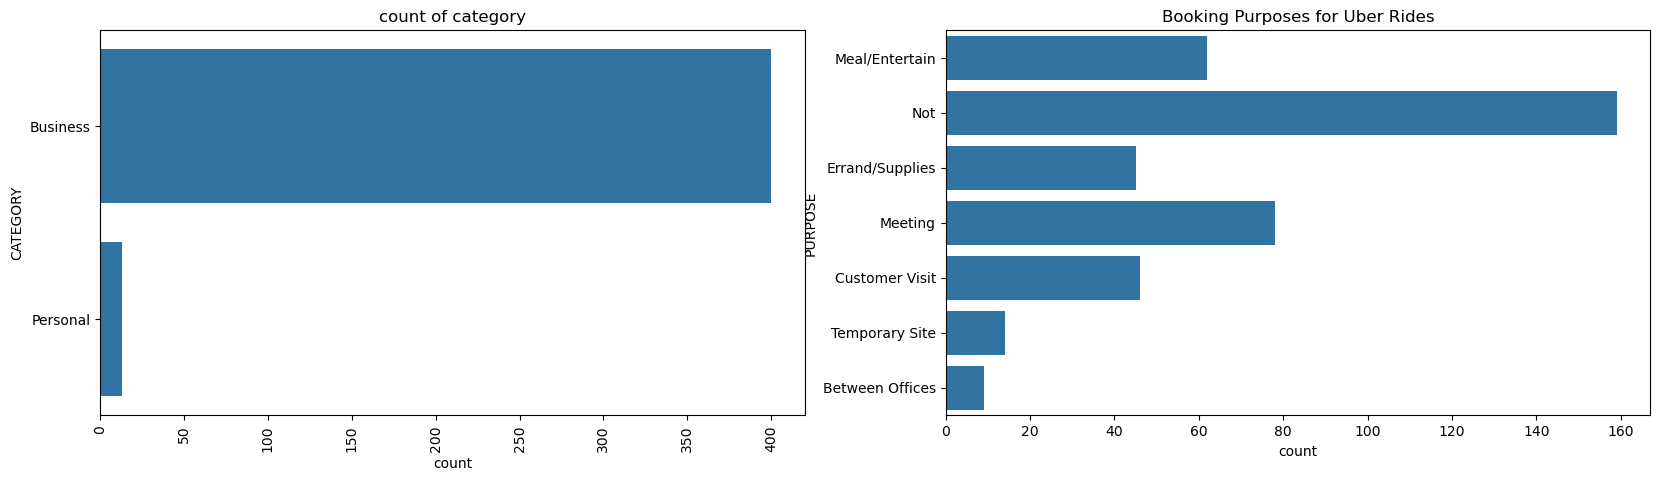

In [136]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.title('count of category')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.title('Booking Purposes for Uber Rides')




### from above graph we can conclude that in  Business category people book the most uber rides and for meeting purpose people book most uber rides

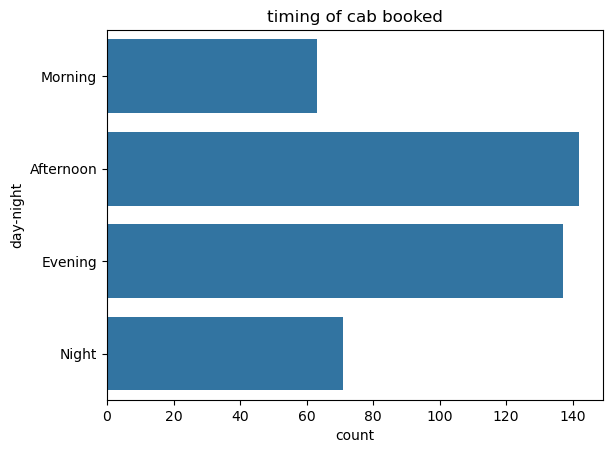

In [139]:
sns.countplot(dataset['day-night'])
plt.title('timing of cab booked')
plt.show()


### from above graph we see that in afternoon time people book cabs the most from uber

In [142]:
dataset.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'strtdate', 'strttime', 'day-night'],
      dtype='object')

In [144]:
dataset['Month']=dataset['START_DATE'].dt.strftime('%b')

In [146]:
dataset['weekday']=dataset['START_DATE'].dt.strftime('%A')

In [148]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,strtdate,strttime,day-night,Month,weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


# Month with Least Cab Bookings

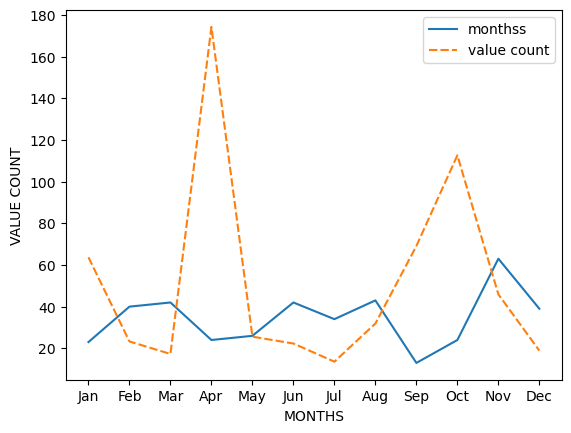

In [150]:
mon=dataset.Month.value_counts(sort=False)#occurence of month
fd=pd.DataFrame({'monthss':mon.values,'value count':dataset.groupby('Month',sort=False)['MILES'].max()})
p=sns.lineplot(data=fd)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT") 
plt.show()

### Insights from the above plot : 
### The counts are very irregular.
### Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.

# Uber Rides by Day of the Week

In [154]:
day_label=dataset.weekday.value_counts()

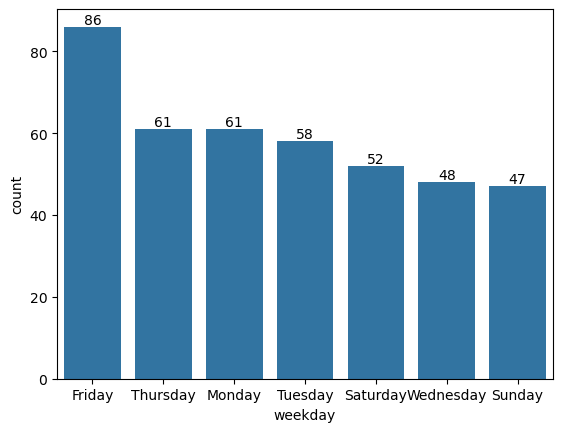

In [156]:
ax=sns.barplot(x=day_label.index,y=day_label)
for bars in ax.containers:
    ax.bar_label(bars)

### Friday is the most popular day for Uber rides, experiencing the highest volume of bookings.
### Sunday sees the lowest number of bookings, suggesting reduced demand on this day.


# Trip Distance Patterns in Uber Rides

<Axes: ylabel='MILES'>

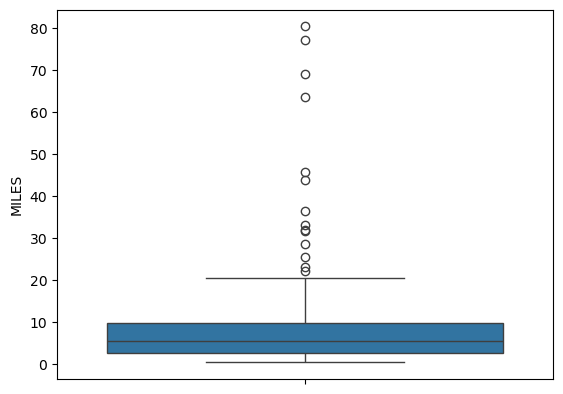

In [168]:

sns.boxplot(dataset[dataset['MILES']<100]['MILES'])


<Axes: ylabel='MILES'>

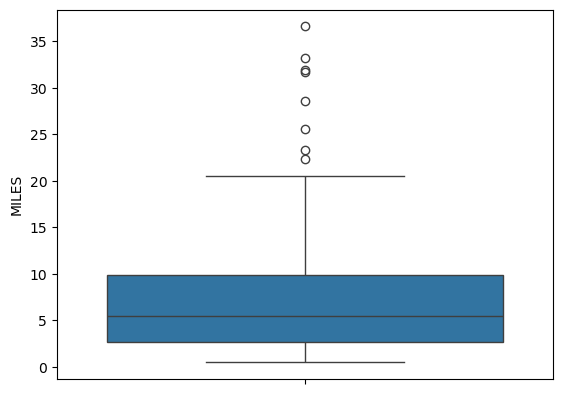

In [172]:
sns.boxplot(dataset[dataset['MILES']<40]['MILES'])

C:\Users\Komal\AppData\Local\Temp\ipykernel_21604\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

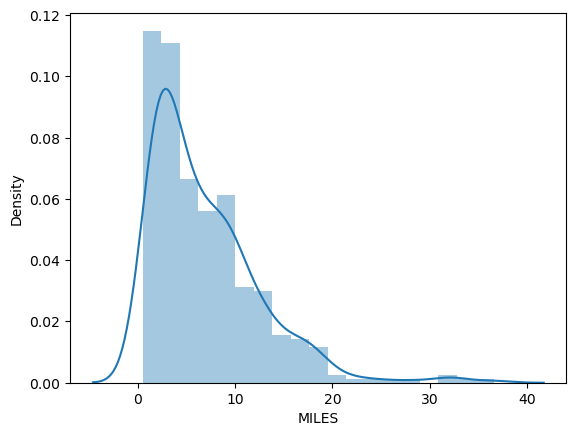

In [176]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

### people usually book a cab  through uber for 0 t0 20 miles